Generally, a parameter selection procedure might be necessary to evaluate Probability of Detection versus Probability of False Alarm (i.e. Pd versus Pf) in order to make a decision about a classifier model selection and/or hyper parameter tuning for a classifier.

In this assignment we will produce an ROC plot presenting operating points of various classifiers and their varying parameters so that we can make a justifiable operating classifier/parameter selection for the following problem.
The classification of fake news or misinformation is a very important task today. Download the fake news dataset (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset), Fake.csv and True.csv files. Load the data sets in your model development framework, examine the features to see they are text in title and text columns. Set fake as 1 and true as 0. Concatenate to have around 44880 rows. Apply necessary pre-processing to extract title column in Tf-Idf. These are basically words and their term frequency – inverse document frequency. Use around 50 features. Make sure sanity check the pipeline and perhaps run your favorite baseline classifier first.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [2]:
fakeNews = pd.read_csv(r'/Users/katieross/desktop/Fake.csv')
trueNews = pd.read_csv(r'/Users/katieross/desktop/True.csv')

In [3]:
fakeNews['class'] = 0
trueNews['class'] = 1

In [4]:
news = pd.concat([fakeNews,trueNews])
news

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
# Tf-Idf on titles.  Assign X and y variables
X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(news['title'])
y = news['class']

In [6]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
# Random Forest Hyperparameters
est = np.arange(1,40)
depth = np.arange(1,3)

In [8]:
# Random Forest Classifier
FPR, TPR = [],[]
for i in est:
    for j in depth:
        rfc = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=42)
    
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]
        FPR += [fp/(fp+tn)]
        print(f'Test Accuracy= {rfc.score(X_test, y_test):.3f}, estimators = {i}, depth = {j}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.524, estimators = 1, depth = 1, TPR 0.000, FPR 0.000
Test Accuracy= 0.582, estimators = 1, depth = 2, TPR 0.144, FPR 0.021
Test Accuracy= 0.524, estimators = 2, depth = 1, TPR 0.000, FPR 0.000
Test Accuracy= 0.582, estimators = 2, depth = 2, TPR 0.144, FPR 0.020
Test Accuracy= 0.543, estimators = 3, depth = 1, TPR 0.043, FPR 0.003
Test Accuracy= 0.713, estimators = 3, depth = 2, TPR 0.972, FPR 0.523
Test Accuracy= 0.543, estimators = 4, depth = 1, TPR 0.043, FPR 0.003
Test Accuracy= 0.739, estimators = 4, depth = 2, TPR 0.969, FPR 0.470
Test Accuracy= 0.543, estimators = 5, depth = 1, TPR 0.043, FPR 0.003
Test Accuracy= 0.738, estimators = 5, depth = 2, TPR 0.969, FPR 0.470
Test Accuracy= 0.543, estimators = 6, depth = 1, TPR 0.043, FPR 0.003
Test Accuracy= 0.716, estimators = 6, depth = 2, TPR 0.994, FPR 0.536
Test Accuracy= 0.543, estimators = 7, depth = 1, TPR 0.043, FPR 0.003
Test Accuracy= 0.716, estimators = 7, depth = 2, TPR 0.995, FPR 0.537
Test Accuracy= 0.543

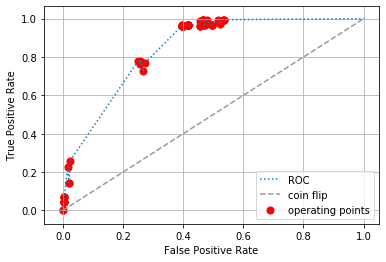

In [9]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
#annot(1, fpr[1], tpr[1])
#annot(2, fpr[4], tpr[4])
#annot(3, fpr[8], tpr[8])
#annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [10]:
# Decision Tree Hyperparameters
min_weight = np.arange(0,0.3,0.01)
depth = np.arange(1,5)

In [11]:
# Decision Tree Classifier
FPR2, TPR2 = [],[]
for i in min_weight:
    for j in depth:
        dtc = DecisionTreeClassifier(min_weight_fraction_leaf=i, max_depth=j, random_state=42)
    
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR2 += [tp/(tp+fn)]
        FPR2 += [fp/(fp+tn)]
        print(f'Test Accuracy= {dtc.score(X_test, y_test):.3f}, min_weight = {i}, depth = {j}, TPR {TPR2[-1]:.3f}, FPR {FPR2[-1]:.3f}')

Test Accuracy= 0.655, min_weight = 0.0, depth = 1, TPR 0.999, FPR 0.656
Test Accuracy= 0.686, min_weight = 0.0, depth = 2, TPR 0.997, FPR 0.597
Test Accuracy= 0.709, min_weight = 0.0, depth = 3, TPR 0.995, FPR 0.550
Test Accuracy= 0.727, min_weight = 0.0, depth = 4, TPR 0.994, FPR 0.516
Test Accuracy= 0.655, min_weight = 0.01, depth = 1, TPR 0.999, FPR 0.656
Test Accuracy= 0.686, min_weight = 0.01, depth = 2, TPR 0.997, FPR 0.597
Test Accuracy= 0.709, min_weight = 0.01, depth = 3, TPR 0.995, FPR 0.550
Test Accuracy= 0.727, min_weight = 0.01, depth = 4, TPR 0.994, FPR 0.516
Test Accuracy= 0.655, min_weight = 0.02, depth = 1, TPR 0.999, FPR 0.656
Test Accuracy= 0.686, min_weight = 0.02, depth = 2, TPR 0.997, FPR 0.597
Test Accuracy= 0.709, min_weight = 0.02, depth = 3, TPR 0.995, FPR 0.550
Test Accuracy= 0.709, min_weight = 0.02, depth = 4, TPR 0.995, FPR 0.550
Test Accuracy= 0.655, min_weight = 0.03, depth = 1, TPR 0.999, FPR 0.656
Test Accuracy= 0.655, min_weight = 0.03, depth = 2, TPR

Test Accuracy= 0.553, min_weight = 0.29, depth = 2, TPR 0.741, FPR 0.618
Test Accuracy= 0.553, min_weight = 0.29, depth = 3, TPR 0.741, FPR 0.618
Test Accuracy= 0.553, min_weight = 0.29, depth = 4, TPR 0.741, FPR 0.618


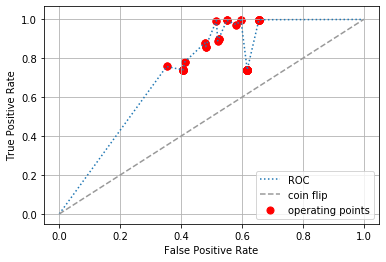

In [12]:
# Sorts the points to display nicely on ROC
FPR2, TPR2 = zip(*sorted(zip(FPR2, TPR2)))
fpr = [0.]+list(FPR2)+[1.]; tpr = [0.]+list(TPR2)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR2, TPR2, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
#annot(1, fpr[1], tpr[1])
#annot(2, fpr[4], tpr[4])
#annot(3, fpr[8], tpr[8])
#annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [13]:
# Neural Network Hyperparameters
alpha = (0.00001,0.0001,0.001,0.01,0.1,1)
learning = (0.00001,0.0001,0.001,0.01,0.1,1)

In [14]:
# Neural Network Classifier
FPR3, TPR3 = [],[]
for i in alpha:
    for j in learning:
        nn = MLPClassifier(alpha=i, learning_rate_init=j, max_iter=1000,random_state=42)
    
        nn.fit(X_train, y_train)
        y_pred = nn.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR3 += [tp/(tp+fn)]
        FPR3 += [fp/(fp+tn)]
        print(f'Test Accuracy= {nn.score(X_test, y_test):.3f}, alpha = {i}, learning = {j}, TPR {TPR3[-1]:.3f}, FPR {FPR3[-1]:.3f}')

Test Accuracy= 0.814, alpha = 1e-05, learning = 1e-05, TPR 0.934, FPR 0.295
Test Accuracy= 0.816, alpha = 1e-05, learning = 0.0001, TPR 0.937, FPR 0.294
Test Accuracy= 0.816, alpha = 1e-05, learning = 0.001, TPR 0.928, FPR 0.286
Test Accuracy= 0.812, alpha = 1e-05, learning = 0.01, TPR 0.925, FPR 0.290
Test Accuracy= 0.814, alpha = 1e-05, learning = 0.1, TPR 0.944, FPR 0.304
Test Accuracy= 0.520, alpha = 1e-05, learning = 1, TPR 1.000, FPR 0.915
Test Accuracy= 0.814, alpha = 0.0001, learning = 1e-05, TPR 0.934, FPR 0.294
Test Accuracy= 0.816, alpha = 0.0001, learning = 0.0001, TPR 0.935, FPR 0.292
Test Accuracy= 0.816, alpha = 0.0001, learning = 0.001, TPR 0.927, FPR 0.285
Test Accuracy= 0.816, alpha = 0.0001, learning = 0.01, TPR 0.934, FPR 0.290
Test Accuracy= 0.813, alpha = 0.0001, learning = 0.1, TPR 0.939, FPR 0.300
Test Accuracy= 0.512, alpha = 0.0001, learning = 1, TPR 1.000, FPR 0.930
Test Accuracy= 0.814, alpha = 0.001, learning = 1e-05, TPR 0.934, FPR 0.294
Test Accuracy= 0.8

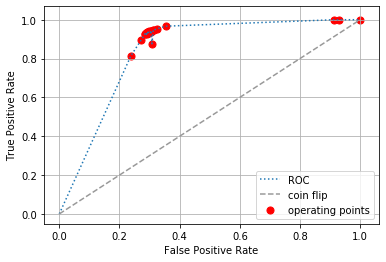

In [15]:
# Sorts the points to display nicely on ROC
FPR3, TPR3 = zip(*sorted(zip(FPR3, TPR3)))
fpr = [0.]+list(FPR3)+[1.]; tpr = [0.]+list(TPR3)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR3, TPR3, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
#annot(1, fpr[1], tpr[1])
#annot(2, fpr[4], tpr[4])
#annot(3, fpr[8], tpr[8])
#annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Problem 2: What kind of behavior would you expect to see in Pd–Pf interaction of an ROC plot? Do you see it in yours?

In a typical ROC curve, I would expect to see Pd increase as Pf increases.  This is basically what can be seen in my plots.  The general curve follows this pattern; however, there are a few points that lie outside of the line. When the probability of a false positive is low, it is more likely that you will encounter fewer true positives also. At a point, the benefit of increasing the true positive rate declines.  This is because it takes a larger increase in the false positive rate to make a small impact on the true positive rate.  To optimize the model using the ROC, you would want to find a value toward the upper left corner, where there is a balance between Pd and Pf.

# Problem 3: From the ROC plot that you created make a selection of the classifier and hyper- parameter setting for this problem. Note that we are classifying fake news so your conclusion might be subjective but has to be supported by your findings.

In this problem, we are attempting to predict when a news story is fake or true.  A true positive would be when a story is fake and is predicted as fake.  A false positive is when a story is true but is predicted as fake.  In my opinion, it is a bigger problem to classify a fake story as true than a true story as fake.  I would therefore want to put more emphasis on optimizing the true positive rate, while still considering the false positive rate.

Based on these assumptions, I would choose to use the Random Forest Classifier and would set the hyperparameters to n_estimators = 25 and depth = 2.  At this point, the false positive rate is 0.375 and the true positive rate is 0.962.  This places it right at the beginning of the higher true positive values.  Decreasing the false positive any more than this will cause a large decrease in the true positive rate.

The Decision Tree Classifier also achieved true positive rates of close to 1.  However, in order to do this, the false positive rate had to be at least 0.5.  The Neural Network Classifier was able to achieve a lower false positive rate than the other two, but the highest true positive was 0.947.  Random Forest did better.

# Problem 4: Try adding text column to the features. Report the performance of the new classifier model. Why do you think it is much higher than the previous one which only uses title?


In [16]:
df = pd.DataFrame(X.toarray())

In [17]:
v = TfidfVectorizer(stop_words='english', max_features=50)
X1 = v.fit_transform(news['text'])
df1 = pd.DataFrame(X1.toarray())

In [18]:
X2 = pd.concat([df, df1], axis=1)

In [19]:
y = news['class']

In [20]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size = 0.2)

In [21]:
# Random Forest Hyperparameters
est = np.arange(1,40)
depth = np.arange(1,3)

In [22]:
# Random Forest Classifier
FPR, TPR = [],[]
for i in est:
    for j in depth:
        rfc = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=42)
    
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]
        FPR += [fp/(fp+tn)]
        print(f'Test Accuracy= {rfc.score(X_test, y_test):.3f}, estimators = {i}, depth = {j}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.523, estimators = 1, depth = 1, TPR 0.000, FPR 0.000
Test Accuracy= 0.992, estimators = 1, depth = 2, TPR 0.996, FPR 0.012
Test Accuracy= 0.677, estimators = 2, depth = 1, TPR 0.871, FPR 0.501
Test Accuracy= 0.992, estimators = 2, depth = 2, TPR 0.998, FPR 0.013
Test Accuracy= 0.768, estimators = 3, depth = 1, TPR 0.870, FPR 0.325
Test Accuracy= 0.992, estimators = 3, depth = 2, TPR 0.997, FPR 0.013
Test Accuracy= 0.776, estimators = 4, depth = 1, TPR 0.843, FPR 0.286
Test Accuracy= 0.990, estimators = 4, depth = 2, TPR 0.992, FPR 0.012
Test Accuracy= 0.763, estimators = 5, depth = 1, TPR 0.769, FPR 0.242
Test Accuracy= 0.987, estimators = 5, depth = 2, TPR 0.990, FPR 0.015
Test Accuracy= 0.772, estimators = 6, depth = 1, TPR 0.801, FPR 0.253
Test Accuracy= 0.988, estimators = 6, depth = 2, TPR 0.989, FPR 0.014
Test Accuracy= 0.782, estimators = 7, depth = 1, TPR 0.841, FPR 0.272
Test Accuracy= 0.989, estimators = 7, depth = 2, TPR 0.992, FPR 0.014
Test Accuracy= 0.782

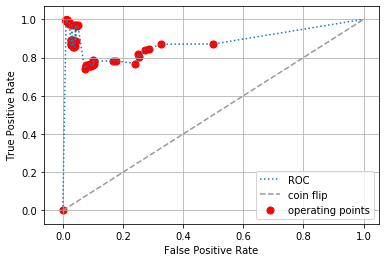

In [23]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
#annot(1, fpr[1], tpr[1])
#annot(2, fpr[4], tpr[4])
#annot(3, fpr[8], tpr[8])
#annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The new model was able to obtain a test accuracy= 0.984, with estimators = 9 and depth = 2.  The TPR = 0.985 and FPR = 0.018.  This model probably performed better because including both the text and title columns caused a duplication of some of the terms.  This makes some of the features redundant.  Since the same words tend to be in the title and the text, the model will find a higher correlation between them and either "true news" or "fake news."  This model might not generalize well because of the duplication.  The ROC curve behaves different here as well.  Here, the TPR decreases as the FPR increases, which is not the typical pattern seen in ROC curves.